In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# NBA playoff teams classificaion using Gaussian mixture models

In [2]:
# Read and shuffle the data from csv
data = pd.read_csv("./data/NBAExcelSheet.xlsx - 2020-2021.csv").iloc[: -1,]
data = data.sample(frac=1, random_state=1).reset_index()
data

,index,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,...,TRB,AST,STL,BLK,TOV,PF,PTS,W,L,PA/G
0,17,18.0,Minnesota Timberwolves,72,241.7,40.7,90.9,0.448,13.1,37.6,...,43.5,25.6,8.8,5.5,14.3,20.9,112.1,23.0,49.0,117.7
1,21,22.0,Los Angeles Lakers*,72,242.4,40.6,86.1,0.472,11.1,31.2,...,44.2,24.7,7.8,5.4,15.2,19.1,109.5,42.0,30.0,106.8
2,10,11.0,Atlanta Hawks*,72,241.7,40.8,87.2,0.468,12.4,33.4,...,45.6,24.1,7.0,4.8,13.2,19.3,113.7,41.0,31.0,111.4
3,19,20.0,San Antonio Spurs,72,242.8,41.9,90.5,0.462,9.9,28.4,...,43.9,24.4,7.0,5.1,11.4,18.0,111.1,33.0,39.0,112.8
4,14,15.0,Memphis Grizzlies*,72,241.7,42.8,91.8,0.467,11.2,31.4,...,46.5,26.9,9.1,5.1,13.3,18.7,113.3,38.0,34.0,112.3
5,20,21.0,Chicago Bulls,72,241.4,42.2,88.6,0.476,12.6,34.0,...,45.0,26.8,6.7,4.2,15.1,18.9,110.7,31.0,41.0,111.6
6,26,27.0,Detroit Pistons,72,242.1,38.7,85.6,0.452,11.6,32.9,...,42.7,24.2,7.4,5.2,14.9,20.5,106.6,20.0,52.0,111.1
7,3,4.0,Utah Jazz*,72,241.0,41.3,88.1,0.468,16.7,43.0,...,48.3,23.7,6.6,5.2,14.2,18.5,116.4,52.0,20.0,107.2
8,24,25.0,Miami Heat*,72,241.4,39.2,83.7,0.468,12.9,36.2,...,41.5,26.3,7.9,4.0,14.1,18.9,108.1,40.0,32.0,108.0
9,22,23.0,Charlotte Hornets,72,241.0,39.9,87.8,0.455,13.7,37.0,...,43.8,26.8,7.8,4.8,14.8,18.0,109.5,33.0,39.0,111.4


In [3]:
# The test data is all the teams that actually made the playoffs, the team names include a *
test_data = data[data['Team'].str.contains("\*", na=False)] # Get all the row where the team name contains a *
test_data

,index,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,...,TRB,AST,STL,BLK,TOV,PF,PTS,W,L,PA/G
1,21,22.0,Los Angeles Lakers*,72,242.4,40.6,86.1,0.472,11.1,31.2,...,44.2,24.7,7.8,5.4,15.2,19.1,109.5,42.0,30.0,106.8
2,10,11.0,Atlanta Hawks*,72,241.7,40.8,87.2,0.468,12.4,33.4,...,45.6,24.1,7.0,4.8,13.2,19.3,113.7,41.0,31.0,111.4
4,14,15.0,Memphis Grizzlies*,72,241.7,42.8,91.8,0.467,11.2,31.4,...,46.5,26.9,9.1,5.1,13.3,18.7,113.3,38.0,34.0,112.3
7,3,4.0,Utah Jazz*,72,241.0,41.3,88.1,0.468,16.7,43.0,...,48.3,23.7,6.6,5.2,14.2,18.5,116.4,52.0,20.0,107.2
8,24,25.0,Miami Heat*,72,241.4,39.2,83.7,0.468,12.9,36.2,...,41.5,26.3,7.9,4.0,14.1,18.9,108.1,40.0,32.0,108.0
11,4,5.0,Portland Trail Blazers*,72,240.3,41.3,91.1,0.453,15.7,40.8,...,44.5,21.3,6.9,5.0,11.1,18.9,116.1,42.0,30.0,114.3
12,2,3.0,Washington Wizards*,72,241.7,43.2,90.9,0.475,10.2,29.0,...,45.2,25.5,7.3,4.1,14.4,21.6,116.6,34.0,38.0,118.5
13,25,26.0,New York Knicks*,72,242.1,39.4,86.5,0.456,11.8,30.0,...,45.1,21.4,7.0,5.1,12.9,20.5,107.0,41.0,31.0,104.7
16,13,14.0,Philadelphia 76ers*,72,242.1,41.4,86.9,0.476,11.3,30.1,...,45.1,23.7,9.1,6.2,14.4,20.2,113.6,49.0,23.0,108.1
17,7,8.0,Denver Nuggets*,72,242.8,43.3,89.2,0.485,12.9,34.2,...,44.4,26.8,8.1,4.5,13.5,19.1,115.1,47.0,25.0,110.1


### Visualize Data and Analysis by Inspection

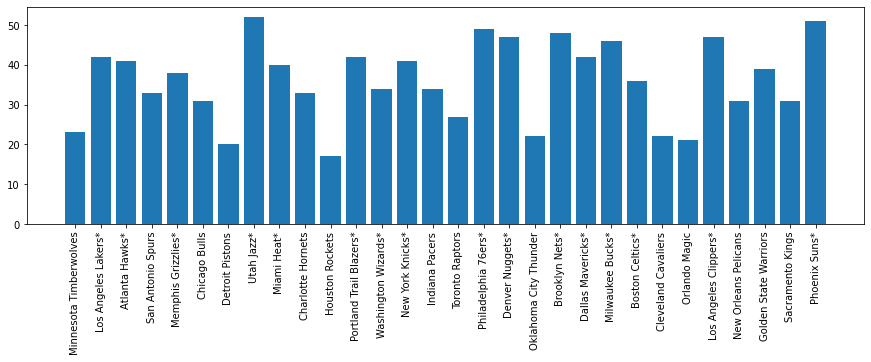

In [4]:
plt.figure(figsize=(15,4))
plt.bar(data.loc[:, 'Team'], data.loc[:, 'W'], align='center')
plt.xticks(rotation=90)
plt.show()

From the graph above, based on the number of games wone, we can infer that the Lakers, Hawks, Grizzilies, Jazz, Blazers, Knicks, 76ers, Nuggets, Nets, Bucks, Clippers, and Suns could make the playoffs. These teams seem to win more games than the other teams.

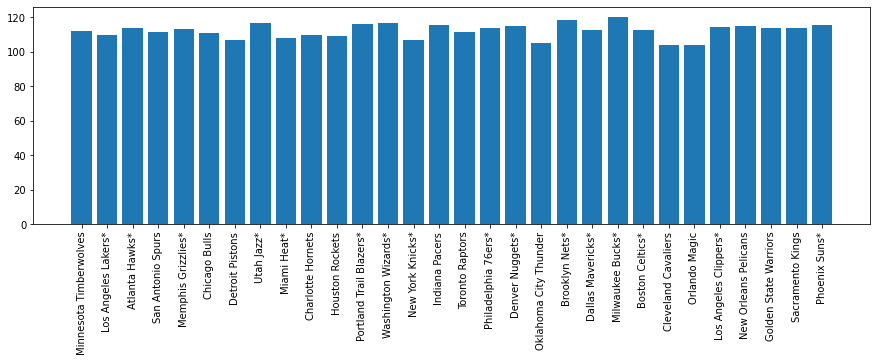

In [5]:
plt.figure(figsize=(15,4))
plt.bar(data.loc[:, 'Team'], data.loc[:, 'PTS'], align='center')
plt.xticks(rotation=90)
plt.show()


The variance in the graph above is low, but the Jazz, Blazers, Wizards, Pacers, 76ers, Nuggetsm Netsm Bucks, Clippers, Pelicans, and Suns seem to score more points than other teams, indicating they are playoff caliber teams.

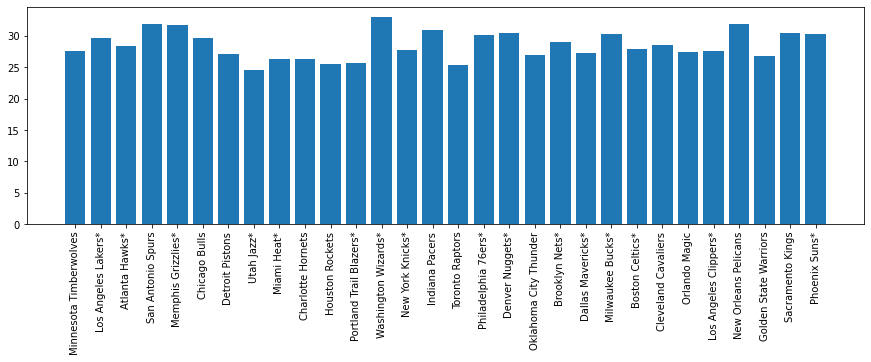

In [6]:
plt.figure(figsize=(15,4))
plt.bar(data.loc[:, 'Team'], data.loc[:, '2P'], align='center')
plt.xticks(rotation=90)
plt.show()


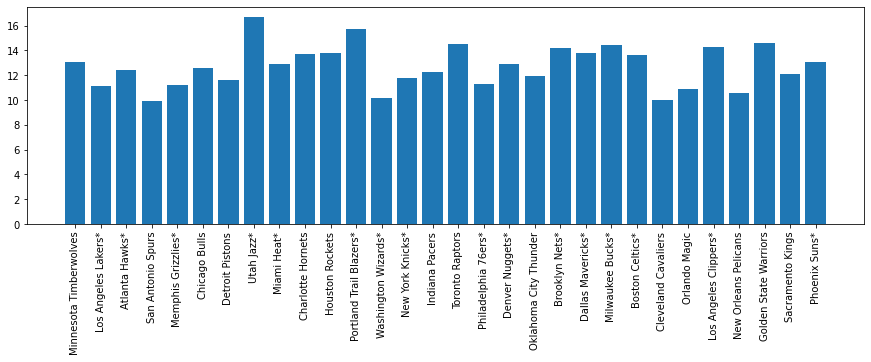

In [7]:
plt.figure(figsize=(15,4))
plt.bar(data.loc[:, 'Team'], data.loc[:, '3P'], align='center')
plt.xticks(rotation=90)
plt.show()


Based on the chart above, we can infer that the Jazz, Blazers, Raptors, Nuggets, Nets, Mavericks, Bucks, Celtics, Clippers, Warriors, and Suns score more 3-pointers than other teams. Usually, playoff caliber teams have better 3-pointers made than the non-playoff teams.

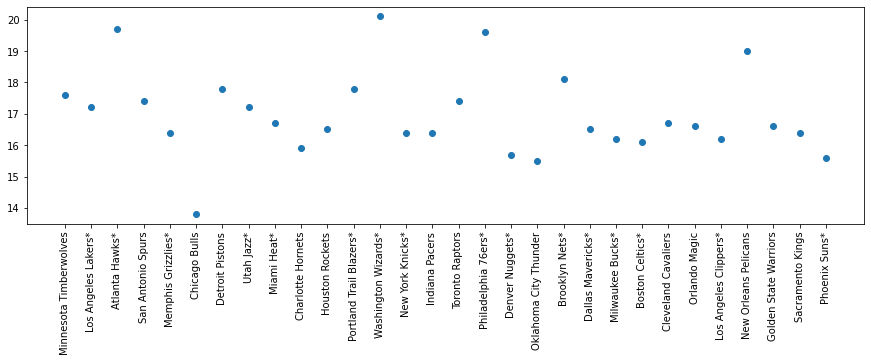

In [8]:
plt.figure(figsize=(15,4))
plt.scatter(data.loc[:, 'Team'], data.loc[:, 'FT'])
plt.xticks(rotation=90)
plt.show()


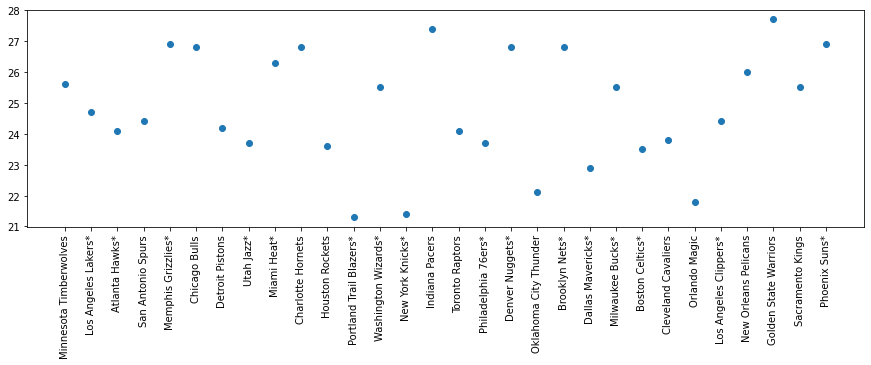

In [9]:
plt.figure(figsize=(15,4))
plt.scatter(data.loc[:, 'Team'], data.loc[:, 'AST'])
plt.xticks(rotation=90)
plt.show()


### Perform PCA

Using PCA, we can reduce the number of dimensions on the data and pick out the features that maximize the variance. There are many features that do not affect whether a team makes the playoffs or not.

After running PCA, we can see that the first 3 principal components contribute to 93% of the variance, so the three components describe the data well enough.

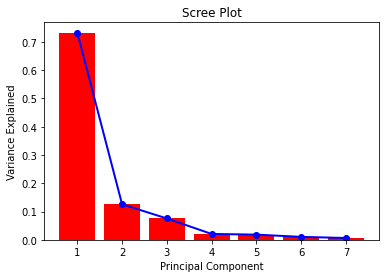

In [10]:
import pca
dataframe = pca.process_dataframe(data)
pcaObject = pca.fit(dataframe)
pca.visualize_variance(pcaObject)

In [11]:
variance_covered_by_components = sum(pcaObject.explained_variance_ratio_[:3])
print("variance covered by the 4 components" + " = " + str(variance_covered_by_components))

variance covered by the 4 components = 0.9333008438609851


In [12]:
principal_components = pca.compute_components(pcaObject)

[(22, 0.6817522672345658), (23, 0.6817522672345658), (21, 0.195997393995417), (24, 0.12457835558066456), (1, 0.06947695520463087), (4, 0.04890624225404631), (14, 0.04539815746746914), (8, 0.04097495944061254), (15, 0.03943597969694109), (5, 0.036781935418217414), (19, 0.028693118638237265), (16, 0.02670964400914438), (11, 0.022735382051715613), (7, 0.020940205915341226), (10, 0.00691496753969639), (13, 0.0058499904053276285), (2, 0.004614783530944514), (17, 0.004423381969357004), (20, 0.00254270682682956), (12, 0.0011702677954691394), (6, 0.0010028885451110348), (18, 0.0009545811564808097), (3, 0.000806218071096246), (9, 0.0007990367198279745), (0, 0.0)]
 
[(8, 0.6660297761125312), (5, 0.5510307957282529), (7, 0.3439990826379847), (4, 0.22326659007180236), (11, 0.12220322285969454), (1, 0.12102303023537993), (24, 0.11745260299861561), (2, 0.11464503606763181), (21, 0.08959184352856972), (15, 0.07726338079658418), (10, 0.0696233806466663), (16, 0.0608392669882507), (14, 0.04111246809234

There are many ways to select features from the principal components. In this case, the features were selected from each of the three principal components where the features contributed at least 10% or more to each component. In other words, feature 22 contributed 68% to component 1 and we keep selecting features starting 22 to 24 since 1 only contributes 6% to the first component. Once the condition is violated, we move on to the second component and repeat. We do this for all components and the selected features are:

In [13]:
#Now, we will analyze the principal components and see what features to select
#As we know, the first principal component contributes to the highest variance, the second contributes the second highest and so on
#Additionally, the features in each component are in descending order, i.e, the first feature contributes more than the second

selected_features = [22, 23, 21, 24, 8, 5, 7, 4, 11, 1, 24, 2, 16]

In [14]:
# Get a list of features that we do not need and drop them from the original dataframe. 
unselected = []
for i in range(len(dataframe.columns) - 1):
    if i not in selected_features:
        unselected.append(i)

# Drop unneeded features from the dataframe
reduced_frame = dataframe.drop(dataframe.columns[unselected],axis=1,inplace=False)
reduced_frame

,FG,FGA,3P,3PA,2P,2PA,FTA,AST,PTS,W,L,PA/G
0,40.7,90.9,13.1,37.6,27.6,53.3,23.1,25.6,112.1,23.0,49.0,117.7
1,40.6,86.1,11.1,31.2,29.6,54.8,23.3,24.7,109.5,42.0,30.0,106.8
2,40.8,87.2,12.4,33.4,28.4,53.9,24.2,24.1,113.7,41.0,31.0,111.4
3,41.9,90.5,9.9,28.4,31.9,62.1,22.0,24.4,111.1,33.0,39.0,112.8
4,42.8,91.8,11.2,31.4,31.7,60.4,21.3,26.9,113.3,38.0,34.0,112.3
5,42.2,88.6,12.6,34.0,29.6,54.6,17.5,26.8,110.7,31.0,41.0,111.6
6,38.7,85.6,11.6,32.9,27.1,52.7,23.4,24.2,106.6,20.0,52.0,111.1
7,41.3,88.1,16.7,43.0,24.5,45.1,21.5,23.7,116.4,52.0,20.0,107.2
8,39.2,83.7,12.9,36.2,26.3,47.5,21.1,26.3,108.1,40.0,32.0,108.0
9,39.9,87.8,13.7,37.0,26.3,50.8,20.9,26.8,109.5,33.0,39.0,111.4


### Perform GMM

We will use GMM to cluster the playoff teams vs the non-playoff teams. This can be done by performing GMM with 2 componoents and this will create 2 clusters. We can analyze the clusters and their means of W/L, 3P, 2P, Points etc to decide which cluster has teams that are playoff caliber and which cluster does not. If one cluster has higher averages in terms of points, wins, 3 points made etc, then that cluster most probably contains play-off teams.

However, there can only be 16 playoff teams, no more, no less. In the case that the playoff cluster has more than 16 teams, we can use the responsibility measures (assignments) of each data point and move the data points (teams) that have the least responsibility assigment of all the points in the cluster, out of the cluster until there are pnly 16 teams remaining. We can do this because the points belong the least to this cluster than other points in the playoff cluster.

In the case that the playoff cluster has less than 16 teams, we can move the least assigned data points (teams) in the non-playoff teams cluster to the playoff cluster until there are 16 teams.

In [15]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(reduced_frame)
labels = gmm.predict(reduced_frame)
assignments = gmm.predict_proba(reduced_frame)

In [16]:
# Now, we have to figure out which cluster is playoffs, and which cluster is non-playoffs
# First we will analyze teams in cluster 0 and look at their average W\L percentage, average 3P, 2P, PTS, PA\G and assists

cluster_0 = []
cluster_0_probs = []

cluster_1 = []
cluster_1_probs = []

for i in range(len(labels)):
    if(labels[i] == 0):
        cluster_0.append(data.iloc[i])
        cluster_0_probs.append(max(assignments[i]))
    else: 
        cluster_1.append(data.iloc[i])
        cluster_1_probs.append(max(assignments[i]))

### Analyze Clusters

In [17]:
# We will calculate the statistics and make a judgement
cluster_0_dataframe = pd.DataFrame(cluster_0)
cluster_1_dataframe = pd.DataFrame(cluster_1)

In [18]:
cluster_0_dataframe.describe()

,index,Rk,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,TRB,AST,STL,BLK,TOV,PF,PTS,W,L,PA/G
count,14.000000,14.000000,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,18.285714,19.285714,72.0,241.421429,40.692857,88.814286,0.458000,11.942857,33.792857,0.352929,...,43.828571,24.828571,7.607143,4.885714,14.192857,19.264286,110.221429,27.071429,44.928571,114.307143
std,8.597214,8.597214,0.0,0.834062,1.859059,1.727095,0.016196,1.493429,3.808586,0.011932,...,1.703132,1.699515,0.649810,0.623707,1.220003,1.415087,4.172286,6.005949,6.005949,2.595400
min,2.000000,3.000000,72.0,240.300000,38.300000,85.600000,0.429000,9.900000,28.400000,0.336000,...,41.400000,21.800000,6.700000,4.100000,11.400000,17.200000,103.800000,17.000000,38.000000,111.100000
25%,12.500000,13.500000,72.0,240.775000,38.925000,88.125000,0.448000,10.675000,30.750000,0.344250,...,42.700000,23.875000,7.075000,4.400000,13.425000,18.025000,107.150000,22.000000,39.500000,111.850000
50%,19.500000,20.500000,72.0,241.550000,40.300000,88.650000,0.453500,12.000000,33.650000,0.350500,...,43.650000,24.950000,7.550000,4.900000,14.500000,19.150000,110.900000,29.000000,43.000000,114.100000
75%,25.250000,26.250000,72.0,242.100000,42.425000,90.175000,0.474750,12.975000,36.525000,0.364000,...,45.150000,25.900000,7.800000,5.175000,14.875000,20.425000,113.300000,32.500000,50.000000,116.425000
max,29.000000,30.000000,72.0,242.800000,43.300000,91.200000,0.481000,14.500000,40.600000,0.370000,...,47.400000,27.400000,8.800000,6.400000,16.100000,21.600000,116.600000,34.000000,55.000000,118.500000


In [19]:
cluster_1_dataframe.describe()

,index,Rk,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,TRB,AST,STL,BLK,TOV,PF,PTS,W,L,PA/G
count,16.000000,16.000000,16.0,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,...,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000
mean,11.187500,12.187500,72.0,241.418750,41.68125,88.068750,0.473125,13.375000,35.375000,0.377500,...,44.71250,24.787500,7.550000,4.875000,13.506250,19.300000,113.71875,43.812500,28.187500,110.162500
std,7.790753,7.790753,0.0,0.909372,1.45658,2.155217,0.011673,1.611418,3.719946,0.015375,...,1.79067,2.002623,0.839841,0.569795,1.050377,0.917242,3.46010,4.805812,4.805812,2.914533
min,0.000000,1.000000,72.0,240.000000,39.20000,83.700000,0.453000,11.100000,30.000000,0.354000,...,41.50000,21.300000,6.300000,4.000000,11.100000,17.300000,107.00000,36.000000,20.000000,104.700000
25%,4.750000,5.750000,72.0,240.600000,41.02500,86.850000,0.467750,12.250000,32.900000,0.370250,...,43.97500,23.650000,6.975000,4.450000,13.125000,18.900000,112.55000,40.750000,24.750000,107.950000
50%,11.000000,12.000000,72.0,241.550000,41.35000,87.700000,0.469000,13.350000,35.400000,0.376500,...,44.40000,24.550000,7.450000,4.900000,13.500000,19.100000,113.70000,42.000000,30.000000,110.150000
75%,15.250000,16.250000,72.0,242.100000,42.87500,88.975000,0.482750,14.325000,37.350000,0.389000,...,45.22500,26.800000,8.100000,5.225000,14.125000,19.600000,115.50000,47.250000,31.250000,112.400000
max,25.000000,26.000000,72.0,242.800000,44.70000,91.800000,0.494000,16.700000,43.000000,0.411000,...,48.30000,27.700000,9.100000,6.200000,15.200000,21.200000,120.10000,52.000000,36.000000,114.300000


<AxesSubplot:>

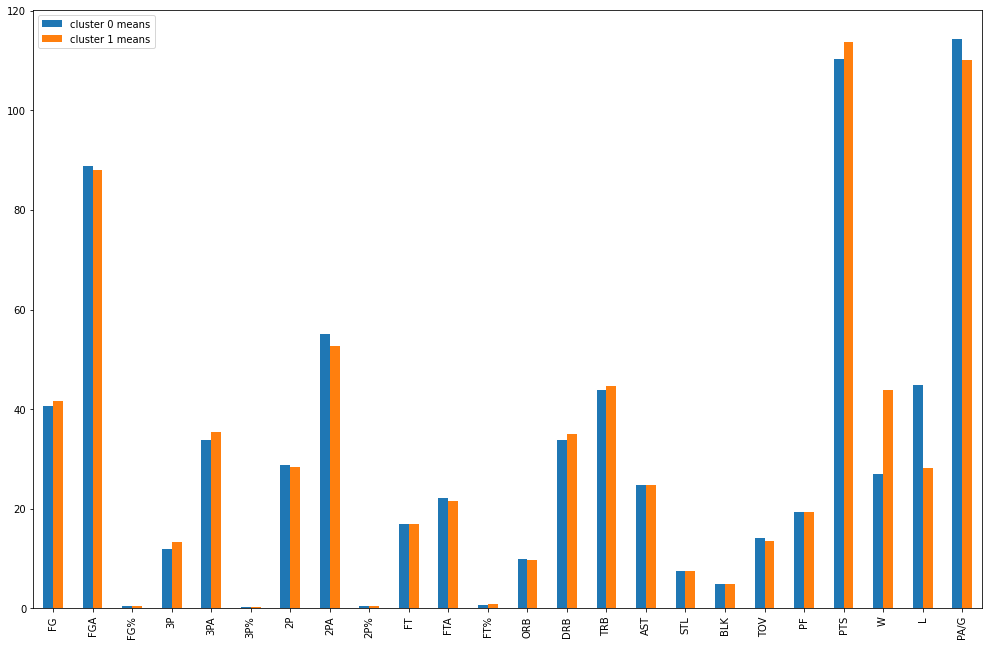

In [20]:
mean_combined = pd.concat([ cluster_0_dataframe.describe().iloc[1], cluster_1_dataframe.describe().iloc[1]], axis = 1, keys=["cluster 0 means", "cluster 1 means"])
mean_combined.drop(["index", "Rk", "MP", "G"], axis=0, inplace=True)
mean_combined.plot.bar(figsize=(17, 11))

In [21]:
# Sort the playoffs and non-playoffs clsuter from least assigned to most assigned
no_playoffs = [x for _, x in sorted(zip(cluster_0_probs, cluster_0_dataframe["Team"]))]
play_offs = [x for _, x in sorted(zip(cluster_1_probs, cluster_1_dataframe["Team"]))]

In [22]:
# If the play_offs cluster has less than 16 teams, move teams into playoffs cluster from non_playoffs cluster with least responsibility
if(len(play_offs) < 16):
    while(len(play_offs) != 16):
        play_offs.append(no_playoffs.pop(0))

# If the play_offs cluster has more than 16 teams, move teams into non_playoffs cluster from playoffs cluster with least responsibility
if(len(play_offs) > 16):
    while(len(play_offs) != 16):
        no_playoffs.append(play_offs.pop(0))

In [23]:
print("Play Off Teams: " , play_offs)
print('')
print("Non-Play Off Teams: ", no_playoffs)

Play Off Teams:  ['Denver Nuggets*', 'Boston Celtics*', 'Atlanta Hawks*', 'Brooklyn Nets*', 'Dallas Mavericks*', 'Golden State Warriors', 'Los Angeles Clippers*', 'Los Angeles Lakers*', 'Memphis Grizzlies*', 'Miami Heat*', 'Milwaukee Bucks*', 'New York Knicks*', 'Philadelphia 76ers*', 'Phoenix Suns*', 'Portland Trail Blazers*', 'Utah Jazz*']

Non-Play Off Teams:  ['Chicago Bulls', 'Minnesota Timberwolves', 'Indiana Pacers', 'Sacramento Kings', 'Houston Rockets', 'Cleveland Cavaliers', 'Detroit Pistons', 'Orlando Magic', 'Charlotte Hornets', 'New Orleans Pelicans', 'Oklahoma City Thunder', 'San Antonio Spurs', 'Toronto Raptors', 'Washington Wizards*']


### Match Percentage

In [24]:
playoff_truth = test_data["Team"].tolist()
sorted(playoff_truth)

['Atlanta Hawks*',
 'Boston Celtics*',
 'Brooklyn Nets*',
 'Dallas Mavericks*',
 'Denver Nuggets*',
 'Los Angeles Clippers*',
 'Los Angeles Lakers*',
 'Memphis Grizzlies*',
 'Miami Heat*',
 'Milwaukee Bucks*',
 'New York Knicks*',
 'Philadelphia 76ers*',
 'Phoenix Suns*',
 'Portland Trail Blazers*',
 'Utah Jazz*',
 'Washington Wizards*']

In [25]:
match_percentage = len(set(play_offs) & set(playoff_truth))/len(playoff_truth)
match_percentage

0.9375

Overall, the GMM clustering algorithm clustered 93.75% of the teams correctly, that is, it clustered 15 of the 16 teams correclty as playoff teams. Instead of the Wizards, who are a playoff team, it considered the Warriors as one, who are not a playoff team.

# NBA Playoff prediction using Support Vector Machines

### Predicting playoff winners given matchups using support vector machines

1. Read and clean data
2. Fitting SVM 
3. Simulate games
4. Visualize and Analysis

In [26]:
from fr import featureReduction

feature = featureReduction()
data = feature.makeDataFrames()
data

,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,REB_away,HOME_TEAM_WINS
1076,105.0,0.451,0.862,0.222,20.0,53.0,37.0,1.0
1077,119.0,0.552,0.909,0.684,23.0,35.0,37.0,0.0
1078,109.0,0.402,0.828,0.241,22.0,48.0,40.0,1.0
1079,120.0,0.478,0.769,0.389,28.0,47.0,36.0,1.0
1080,118.0,0.489,0.857,0.500,26.0,43.0,46.0,1.0
...,...,...,...,...,...,...,...,...
2320,112.0,0.370,0.829,0.313,20.0,61.0,49.0,0.0
2321,84.0,0.325,0.880,0.256,17.0,41.0,54.0,0.0
2322,104.0,0.413,0.730,0.324,20.0,56.0,47.0,0.0
2323,87.0,0.357,0.800,0.318,15.0,46.0,55.0,1.0


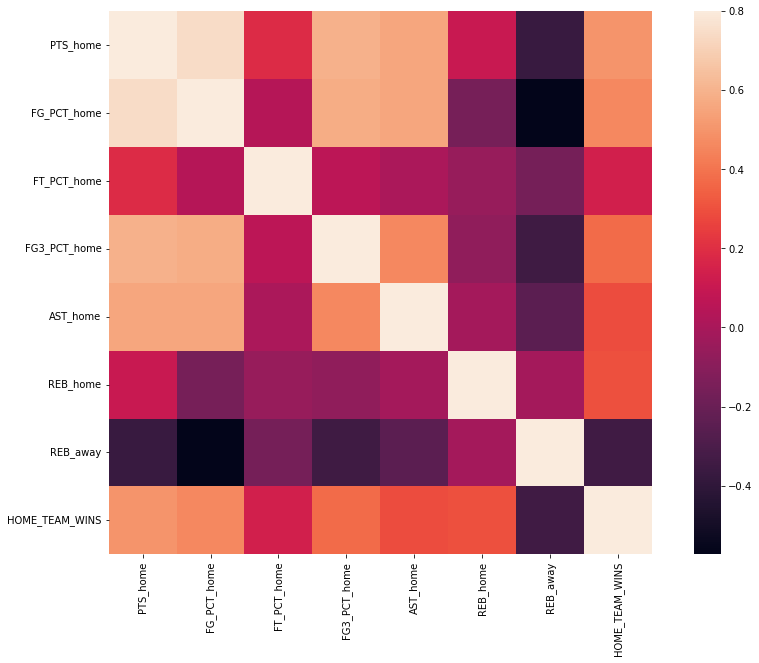

In [27]:
correlation_matrix = feature.getCorrelationMatrix(data)
correlation_matrix

In [28]:
feature.train()
feature.train2()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
Features: 9/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished
Features: 8/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished
Features: 7/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished
Features: 6/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
Features: 5/3

('FG_PCT_home', 'FG3_PCT_home', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'REB_away')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
Features: 4/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
Features: 3/3

('FG_PCT_home', 'FT_PCT_home', 'REB_home')


In [29]:
sel = feature.backward_elimination(data, feature.yhome)
sel

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['PTS_home', 'AST_home', 'REB_home', 'REB_away', 'HOME_TEAM_WINS']

### F

In [30]:
# Import packages for the discriminator part of the model
from sklearn import svm 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer, balanced_accuracy_score 
from sklearn.pipeline import make_pipeline 

In [31]:
# Import packages for the generator part of the model
from scipy import stats 
from fitter import Fitter 
import copy 

In [32]:
df = pd.read_csv('./data/games.csv')
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0


In [33]:
# We want sort all the games by their respective dates and drop all games that occur before 2004
df = df.sort_values(by = 'GAME_DATE_EST')
df = df.loc[df['GAME_DATE_EST'] > "2004-01-01"].reset_index(drop = True)
df.isnull().values.any()

False

In [34]:
# For the teams data, we want to replace all the Ids with names
df_teams = pd.read_csv('./data/teams.csv')
df_teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [35]:
df_teams = df_teams[['TEAM_ID', 'NICKNAME']]

home_teams = df_teams.copy()
home_teams.columns = ['HOME_TEAM_ID', 'NICKNAME'] # Replace home team ID with name in df_teams

# Merge home team ID with name of the teams
home_teams_merge = pd.merge(df['HOME_TEAM_ID'], home_teams, how ="left", on='HOME_TEAM_ID')  
df['HOME_TEAM_ID'] = home_teams_merge['NICKNAME']


away_teams = df_teams.copy()
away_teams.columns = ['VISITOR_TEAM_ID', 'NICKNAME']

away_teams_merge = pd.merge(df['VISITOR_TEAM_ID'], away_teams, how ="left", on='VISITOR_TEAM_ID')
df['VISITOR_TEAM_ID'] = away_teams_merge['NICKNAME']
df.head() 

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2004-01-02,20300458,Final,Timberwolves,Hawks,2003,1610612750,93.0,0.409,0.929,...,32.0,56.0,1610612737,75.0,0.372,0.737,0.375,22.0,31.0,1
1,2004-01-02,20300451,Final,Wizards,Warriors,2003,1610612764,97.0,0.446,0.611,...,30.0,58.0,1610612744,79.0,0.403,0.818,0.381,20.0,36.0,1
2,2004-01-02,20300454,Final,Knicks,Bulls,2003,1610612752,99.0,0.470,0.800,...,25.0,38.0,1610612741,104.0,0.488,0.724,0.385,20.0,44.0,0
3,2004-01-02,20300457,Final,Pistons,Suns,2003,1610612765,93.0,0.389,0.947,...,26.0,54.0,1610612756,81.0,0.395,0.895,0.364,20.0,34.0,1
4,2004-01-02,20300456,Final,Heat,Magic,2003,1610612748,112.0,0.466,0.792,...,29.0,42.0,1610612753,101.0,0.430,0.750,0.450,15.0,37.0,1


### Fitting SVM discriminator

In [36]:
# Givan the dataset, we want to predict the playoffs simulation of the 2019-2020 NBA year
df = df.loc[df['GAME_DATE_EST'] < '2020-08-01'].reset_index(drop=True)

In [37]:
features = list(df.columns)
features

['GAME_DATE_EST',
 'GAME_ID',
 'GAME_STATUS_TEXT',
 'HOME_TEAM_ID',
 'VISITOR_TEAM_ID',
 'SEASON',
 'TEAM_ID_home',
 'PTS_home',
 'FG_PCT_home',
 'FT_PCT_home',
 'FG3_PCT_home',
 'AST_home',
 'REB_home',
 'TEAM_ID_away',
 'PTS_away',
 'FG_PCT_away',
 'FT_PCT_away',
 'FG3_PCT_away',
 'AST_away',
 'REB_away',
 'HOME_TEAM_WINS']

In [38]:
# Now,we will use the the selected features from the feature selection process done earlier
sel_features = ['FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
    'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away']
x = df[sel_features]
x.head()

,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
0,0.409,0.929,0.308,32.0,56.0,0.372,0.737,0.375,22.0,31.0
1,0.446,0.611,0.400,30.0,58.0,0.403,0.818,0.381,20.0,36.0
2,0.470,0.800,0.333,25.0,38.0,0.488,0.724,0.385,20.0,44.0
3,0.389,0.947,0.238,26.0,54.0,0.395,0.895,0.364,20.0,34.0
4,0.466,0.792,0.500,29.0,42.0,0.430,0.750,0.450,15.0,37.0


In [39]:
# check the targets
y = df['HOME_TEAM_WINS']
y.head()

0    1
1    1
2    0
3    1
4    1
Name: HOME_TEAM_WINS, dtype: int64

In [40]:
# Change the training and testing data to numpy arrays
x = x.to_numpy()
y = y.to_numpy()

In [41]:
# Split training and testing data (70-30 split in this case)
X_train, X_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size=0.3, random_state=42)

print("X shape", X_train.shape, "y shape", y_train.shape)

X shape (15920, 10) y shape (15920,)


In [42]:
# Scale features using a feature scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

#### Train SVM

In [50]:
# Fit the SVM classifier
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Perdict on the test data
y_pred = svm_classifier.predict(X_test)
print("The accuracy score is: ", balanced_accuracy_score(y_test, y_pred))

The accuracy score is:  0.6976087940769149


In [44]:
# Tune the hyperparameters using GridSearch
scoring = make_scorer(balanced_accuracy_score)
parameter_grid = {'C': [0.1, 1, 10],  
                  'gamma': [1,0.1,0.01]} #

gridSearch = GridSearchCV(svm.SVC(kernel='linear'), parameter_grid, scoring = scoring, refit=True, verbose=2) 
gridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................................C=0.1, gamma=1; total time=   5.2s
[CV] END .....................................C=0.1, gamma=1; total time=   4.5s
[CV] END .....................................C=0.1, gamma=1; total time=   6.1s
[CV] END .....................................C=0.1, gamma=1; total time=  10.3s
[CV] END .....................................C=0.1, gamma=1; total time=  10.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=  10.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=  10.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=  10.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   8.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   7.6s
[CV] END ..................................C=0.1, gamma=0.01; total time=   8.3s
[CV] END ..................................C=0.1,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
             scoring=make_scorer(balanced_accuracy_score), verbose=2)

#### Fit the SVM Generator

In [46]:
# In the generator part, just fit the regular season data of the prediction year(2019-2020)
df_test = df.loc[df['GAME_DATE_EST'] > '2019-10-01'].reset_index(drop=True)
df_test.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2019-10-04,11900003,Final,Kings,Pacers,2019,1610612758,131.0,0.494,0.778,...,30.0,30.0,1610612754,132.0,0.516,0.788,0.370,26.0,47.0,0
1,2019-10-04,11900002,Final,Clippers,Rockets,2019,1610612746,96.0,0.384,0.600,...,26.0,49.0,1610612745,109.0,0.375,0.800,0.229,21.0,52.0,0
2,2019-10-05,11900006,Final,Warriors,Lakers,2019,1610612744,101.0,0.393,0.769,...,20.0,47.0,1610612747,123.0,0.475,0.633,0.303,32.0,58.0,0
3,2019-10-05,11900007,Final,Spurs,Magic,2019,1610612759,89.0,0.388,0.750,...,22.0,40.0,1610612753,125.0,0.526,0.714,0.361,29.0,47.0,0
4,2019-10-05,11900005,Final,Pacers,Kings,2019,1610612754,130.0,0.521,0.944,...,35.0,51.0,1610612758,106.0,0.378,0.780,0.353,24.0,35.0,1


In [47]:
# Choose distributions to fit into the generator
selected_distributions = [
    'norm','t', 'f', 'chi', 'cosine', 'alpha', 
    'beta', 'gamma', 'dgamma', 'dweibull',
    'maxwell', 'pareto', 'fisk']

In [48]:
unique_teams = df['HOME_TEAM_ID'].unique() # extract all the unique teams

all_team_simulation_data = {}

for team in unique_teams:
    
    df_team = df_test.loc[(df_test['HOME_TEAM_ID'] == team) | (df_test['VISITOR_TEAM_ID'] == team)]
    df_1 = df_team.loc[df_team['HOME_TEAM_ID'] == team][sel_features[:5]]
    df_0 = df_team.loc[df_team['VISITOR_TEAM_ID'] == team][sel_features[5:]]

    # combine them
    df_0.columns = df_1.columns # before concating, match the column names
    df_s = pd.concat([df_1, df_0], axis = 0)
    
    # convert the pandas.DataFrame to numpy array
    all_team_simulation_data[team] = df_s.to_numpy()

In [51]:
generator_data = {} # store the data that our Generator will rely on
for team_name in unique_teams:
    
    feature_dis_paras = []
    data = all_team_simulation_data[team_name]
    
    # 5 features for each team
    for i in range(5): 
        f = Fitter(data[:, i]) # initalize a Fitter instance
        f.distributions = selected_distributions # use only the selected distributions (faster)
        f.fit() # do the fitting 
        best_paras = f.get_best(method='sumsquare_error') # get the best fitted paras
        feature_dis_paras.append(best_paras)
        
    generator_data[team_name] = feature_dis_paras
    
print('Features for all teams have been fitted!')

Features for all teams have been fitted!


#### Simulate games

In [52]:
generator_data_copy = generator_data.copy()

generator_distros = {
 'alpha': stats.alpha.rvs,
 'beta': stats.beta.rvs,
 'chi': stats.chi.rvs,
 'cosine': stats.cosine.rvs,
 'dgamma': stats.dgamma.rvs,
 'dweibull':stats.dweibull.rvs,
 'f':stats.f.rvs,
 'fisk':stats.fisk.rvs,
 'gamma': stats.gamma.rvs,
 'maxwell':stats.maxwell.rvs,
 'norm':stats.norm.rvs,
 'pareto':stats.pareto.rvs,
 't':stats.t.rvs,
}


In [53]:
game_pipeline = make_pipeline(scaler, best_parameters)

In [54]:
# Below is the groups list of all the play-offs teams generated by the Gaussian Mixture Model
group_list = [
     # Eastern Conference
     ('76ers', 'Warriors'),  
     ('Knicks', 'Hawks'), 
    
     ('Bucks', 'Heat'), 
     ('Nets', 'Celtics'), # group D
    
     # Western Conference
     ('Jazz','Grizzlies'),  # group E
     ('Clippers','Mavericks'), # group F
    
     ('Nuggets', 'Trail Blazers'), # group G
     ('Suns', 'Lakers')] # group H

In [55]:
%load_ext autoreload
%autoreload 2

In [56]:
from tournament import Tournament
from game import Game

tournament = Tournament()
tournament.simulate(DATA=generator_data_copy, generator_distros=generator_distros, pipeline=game_pipeline, group_list = group_list, n_simulation=5000)

In [57]:
for key, value in tournament.get_round_probs().items():
    print(key, ' : ', value)

0  :  {'76ers': 0.08365, 'Knicks': 0.0069, 'Bucks': 0.06415, 'Nets': 0.05975, 'Jazz': 0.055775, 'Clippers': 0.0139, 'Nuggets': 0.125, 'Suns': 0.0, 'Warriors': 0.04135, 'Hawks': 0.1181, 'Heat': 0.06085, 'Celtics': 0.06525, 'Grizzlies': 0.069225, 'Mavericks': 0.1111, 'Trail Blazers': 0.0, 'Lakers': 0.125}
1  :  {'76ers': 0.08565, 'Knicks': 5e-05, 'Bucks': 0.0673, 'Nets': 0.05545, 'Jazz': 0.0541, 'Clippers': 0.0036, 'Nuggets': 0.12665, 'Suns': 0.0, 'Warriors': 0.03485, 'Hawks': 0.12945, 'Heat': 0.0636, 'Celtics': 0.06365, 'Grizzlies': 0.0841, 'Mavericks': 0.1082, 'Trail Blazers': 0.0, 'Lakers': 0.12335}
2  :  {'76ers': 0.0882, 'Knicks': 0.0, 'Bucks': 0.0699, 'Nets': 0.0531, 'Jazz': 0.0491, 'Clippers': 0.0004, 'Nuggets': 0.1195, 'Suns': 0.0, 'Warriors': 0.0264, 'Hawks': 0.137, 'Heat': 0.0623, 'Celtics': 0.0631, 'Grizzlies': 0.0974, 'Mavericks': 0.1158, 'Trail Blazers': 0.0, 'Lakers': 0.1178}
3  :  {'76ers': 0.0892, 'Knicks': 0.0, 'Bucks': 0.0706, 'Nets': 0.053, 'Jazz': 0.0454, 'Clippers': 

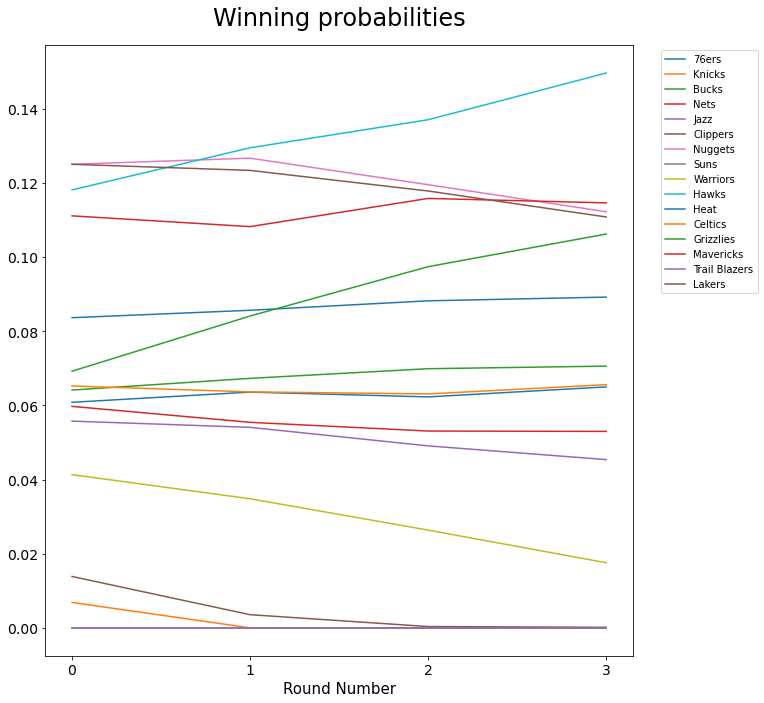

In [95]:
import seaborn as sns

    
stats = list(tournament.get_round_probs().values())
names = list(stats[0].keys())

x = list(tournament.get_round_probs().keys())
y = np.array([list(i.values()) for i in stats])

# we need at least 16 different colors, one for each team
c_1 =  sns.color_palette('tab10', n_colors = 10)
c_2 =  sns.color_palette("pastel", n_colors = 10)
color_map = c_1 + c_2 

fig = plt.figure(figsize=(10, 10))
plt.plot(x, y) 
plt.legend(bbox_to_anchor=(1.1, 1.1), loc = 'upper left', fontsize=13)
plt.xticks(x, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Round Number', fontsize = 15)
plt.title('Winning probabilities', pad = 20, fontsize = 24)
plt.tight_layout()
plt.gca().legend(names, bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()


In [97]:
best_parameters = gridSearch.best_estimator_
best_score = gridSearch.best_score_
print("Best params: ", best_parameters, " and best score: ", best_score)

Best params:  SVC(C=1, gamma=1, kernel='linear')  and best score:  0.8344684869377424


Here we can see that the best parameters for the SVM model are C = 1, gamma = 1 and the accuracy those parameters produced are 83% on the validation set.

### Observations


Here, we can see that the Atlanta Hawks win the chapionship, but in reality, the Milwuakee Bucks won the championship.However, the Hawks made it to the semi-finals so the prediction is not far off. The suns are predicted to lose the first round against the Lakers since the Lakers at that time are a better team with a better roster. The Lakers also won the championship the previous year so it makes sense for the Lakers to win over the Suns.

### Improvements

1. Use more and better features: Most of the features used for training the SVM classification model include team statistics such as rebounds, free throws, field goals, and assists. However, in reality there a lot more factors that affect the outcome of the game such as players, player matchups, home crowd attendance and so on. To improve the model, we can also consider those features.

2. Use better win/loss model: Our trained SVM Discriminator only has about 70%+ accuracy, it is good but not perfect. We can improve by adding ensemble learning models or using a Neural Network based approach.

3. Better distribution fitting: In the project, we used only a handful of distributions to do the fitting. To reduce the fitting errors, we can use more complex distributions. The lower the fitting error, the more realistic the samples are.

4. Run more simulations: We are only simulating the playoffs 5000 times for the sake of time. However, with more computational resources, we should be able to simulate more than 5000 times to improve performance and accuracy.